# MICROSOFT_MOVIE_MAKING

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

## Load necessary data into variables

In [2]:
tmdb_csv = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_csv.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
tmdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
bom_csv = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
print (bom_csv.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [5]:
print (bom_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [6]:
rt_movie = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep="\t")
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter="\t", encoding="latin1")
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [9]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [10]:
tn_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Finding most produced genre

In [12]:
tmdb_csv["genre_ids"].value_counts().head(4)
#https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
#99-Documentary,18-Drama,35-Comedy

[99]    3700
[]      2479
[18]    2268
[35]    1660
Name: genre_ids, dtype: int64

In [13]:
rt_movie["genre"].value_counts().head(3)

Drama           151
Comedy          110
Comedy|Drama     80
Name: genre, dtype: int64

In [14]:
#Documentaries are the most produced movie genre,followed by drama and comedy

## Plotting most popular Genre

In [15]:
##Sorting by genre

#print(bool(re.search("Drama",rt_movie.iloc[15]["genre"],re.IGNORECASE)))  
#j=0
#i=0
#rt_drama=pd.DataFrame()
#while j < len(rt_movie):
    #for i in range(len(rt_movie)):
    #if (bool(re.search("Drama",rt_movie.iloc[j]["genre"],re.IGNORECASE)))==True:
            #rt_drama=rt_drama.append(rt_movie.iloc[j])
            #j+=1

        #print(rt_movie.iloc[j])
    #if bool(re.search("Drama",rt_movie.iloc[j]["genre"],re.IGNORECASE))==True:
        #j+=1
#print(len(rt_drama))

#type(rt_movie.iloc[15]["genre"])
#bool(rt_movie.iloc[1554]["genre"].find("Drama"))
#rt_drama.head()
#rt_drama=pd.DataFrame()
#(str(rt_movie["genre"])).value_counts()
#rt_movie.iloc[10:20]

In [16]:
rt_movie_ranks=pd.DataFrame(rt_movie["genre"].value_counts())

In [17]:
movie_genres=rt_movie_ranks.index.values.tolist() #x axis,movie genres

In [18]:
Movie_count=rt_movie_ranks["genre"].values.tolist() #y axis,no.movies released

In [19]:
def make_bar_graph(color1,color2,color3,color4,color5):
    my_colours=[color1,color2,color3,color4,color5]
    plt.style.use("seaborn")
    plt.set_color=("white")
    plt.figure(figsize=(10,8))
    plt.bar(movie_genres[:5],Movie_count[:5],color=my_colours)
    plt.title("Most Popular Genre",fontsize=20,fontweight="bold")
    plt.ylabel("Movie Count",fontsize=15,color=color5)
    plt.xlabel("Movie Genres",fontsize=15,color=color5)
    plt.xticks(rotation=60,fontsize=12,color=color5)
    plt.yticks(color=color5)
    return plt.show()
    

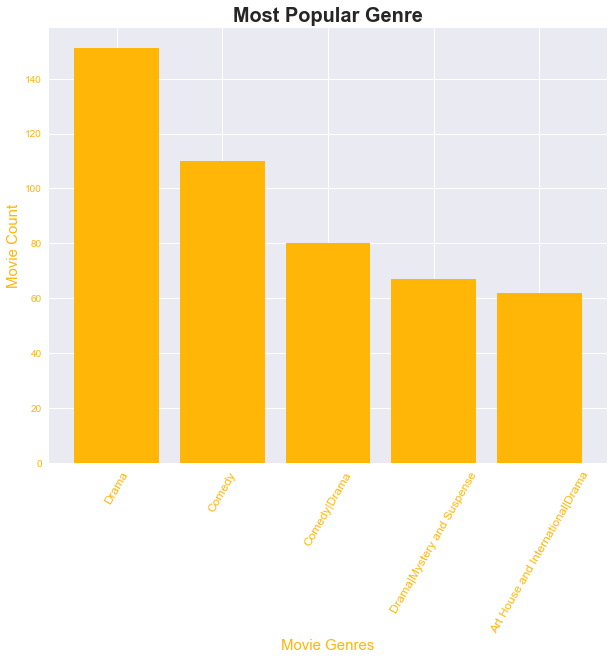

In [20]:
#plotting format
make_bar_graph("#ffb606","#ffb606","#ffb606","#ffb606","#ffb606")

### Plot Highlighting Drama

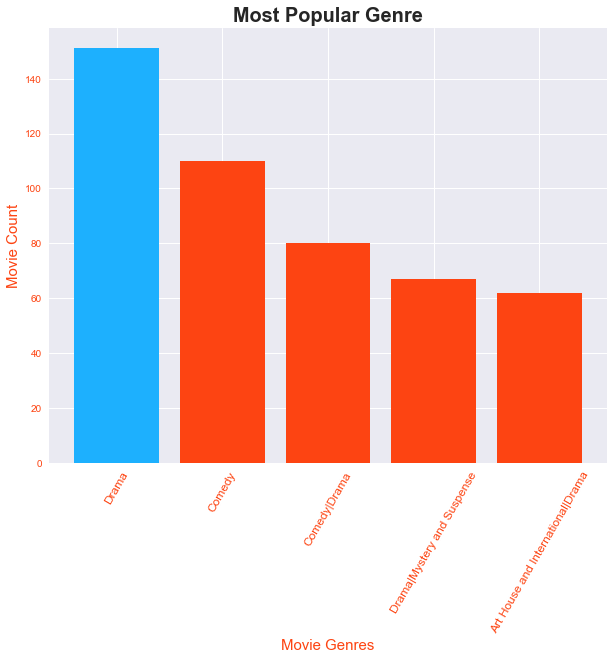

In [24]:
make_bar_graph("#1db0fe","#fd4412","#fd4412","#fd4412","#fd4412")

### Plot Highlighting Comedy

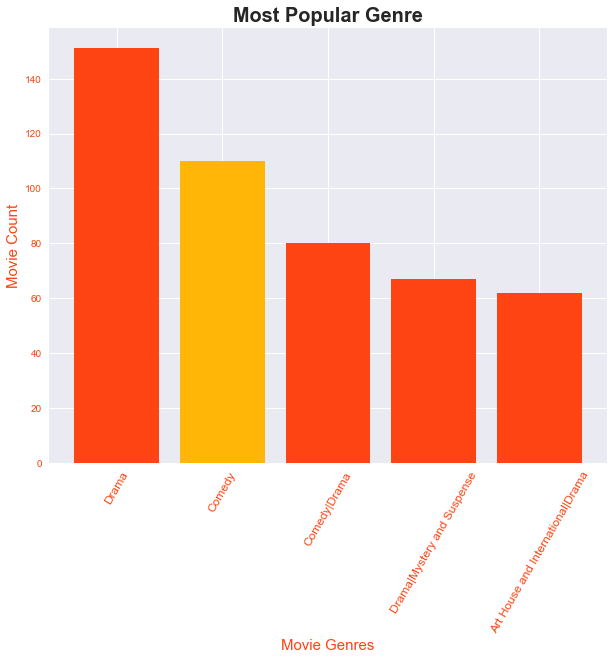

In [32]:
make_bar_graph("#fd4412","#ffb606","#fd4412","#fd4412","#fd4412")

### Plot Highlighting Comedy/Drama

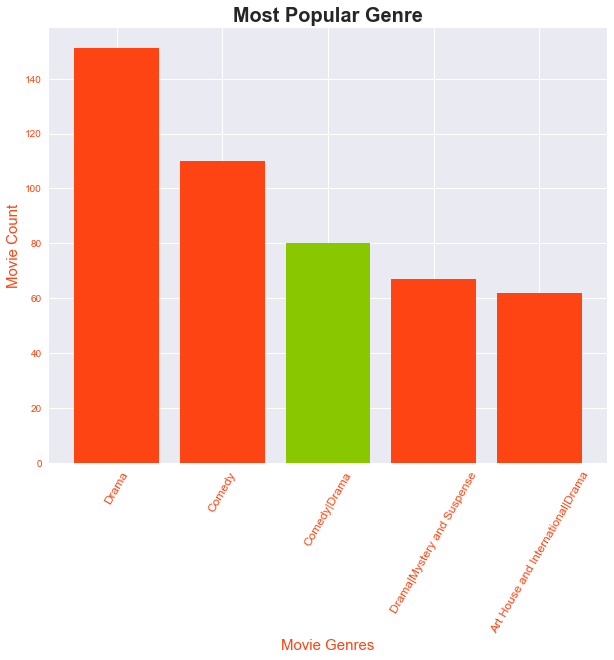

In [33]:
make_bar_graph("#fd4412","#fd4412","#89c701","#fd4412","#fd4412")